# Phân loại rượu bằng thuật toán Cây Quyết định (Decision Tree)

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import datasets

## Bộ dữ liệu Wine

Bộ dữ liệu Wine là kết quả của phân tích hóa học các loại rượu được trồng cùng một vùng ở Ý, nhưng xuất phát từ ba giống nho khác nhau.
Phân tích này xác định lượng của 13 thành phần hóa học có trong mỗi loại rượu.

Nhiệm vụ của chúng ta là phân loại ba loại rượu dựa trên các thành phần hóa học dưới đây:

1) Alcohol – Độ cồn

2) Malic acid – Axit malic

3) Ash – Tro

4) Alcalinity of ash – Độ kiềm của tro

5) Magnesium – Magiê

6) Total phenols – Tổng phenol

7) Flavanoids – Flavonoid

8) Nonflavanoid phenols – Phenol không phải flavonoid

9) Proanthocyanins – Proanthocyanin

10) Color intensity – Độ đậm màu

11) Hue – Màu sắc (hue)

12) OD280/OD315 of diluted wines – Tỷ số OD280/OD315 của rượu pha loãng

13) Proline – Prolin

Nguồn: https://archive.ics.uci.edu/ml/datasets/wine (https://archive.ics.uci.edu/ml/datasets/wine)

In [2]:
# Tải dữ liệu
dataset = datasets.load_wine()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [3]:
data_df = pd.DataFrame(X, columns=dataset.feature_names)
data_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Trong ví dụ này, chúng ta chọn mô hình Cây Quyết định (Decision Tree) để phân loại ba loại rượu.
Để làm điều đó, chúng ta sử dụng lớp DecisionTreeClassifier trong sklearn với max_depth=4, max_depth là độ sâu tối đa của cây, giới hạn số mức rẽ nhánh của cây quyết định để tránh overfitting.

In [4]:
model = DecisionTreeClassifier(max_depth=4, )
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Dự đoán và Đánh giá

In [5]:
y_pred = model.predict(X_test)
print(f"Classification report for DecisionTree:\n"
f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for DecisionTree:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.90      0.90      0.90        21
           2       1.00      1.00      1.00         8

    accuracy                           0.91        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.91      0.91      0.91        45




<Figure size 500x500 with 0 Axes>

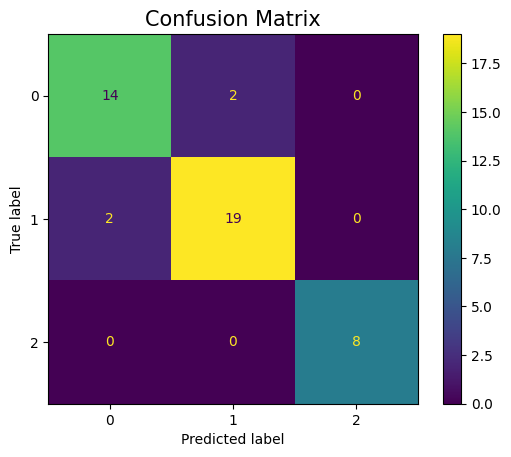

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(5, 5))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
disp.ax_.set_title("Confusion Matrix", fontsize=15)
plt.show()

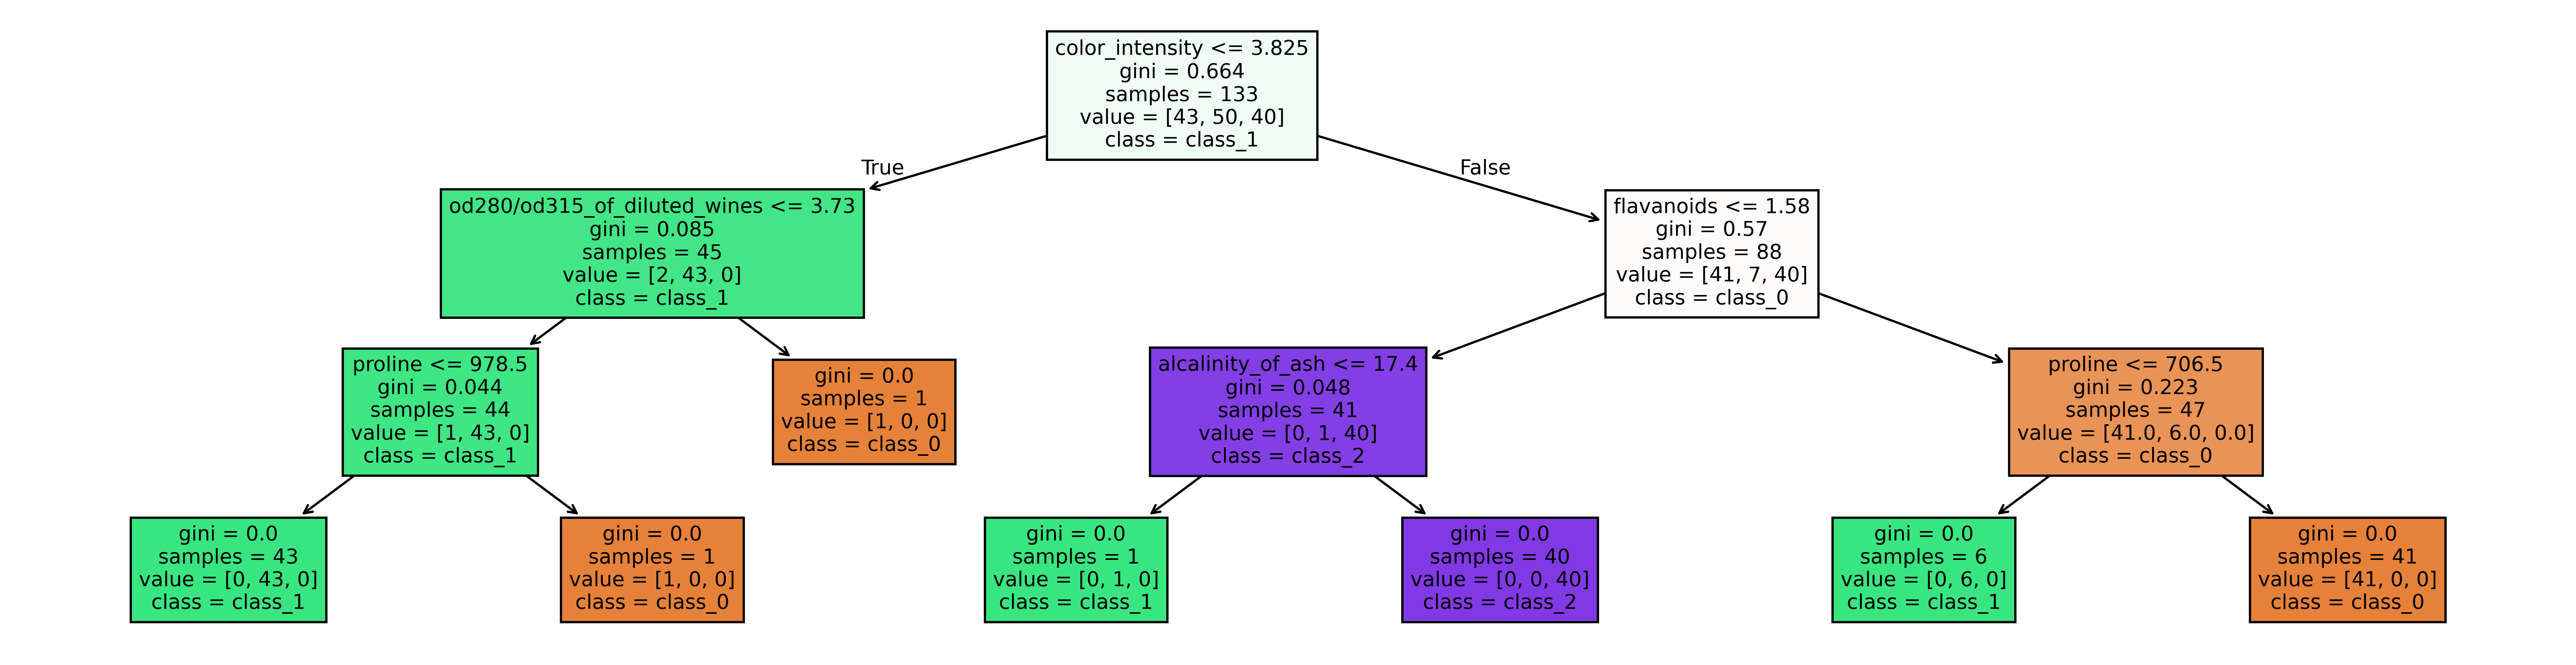

In [9]:
# Hiển thị cây quyết định (Decision Tree)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 5), dpi=500)
tree.plot_tree(model,
feature_names =dataset.feature_names,
class_names=dataset.target_names,
filled = True);

# Ranh giới quyết định

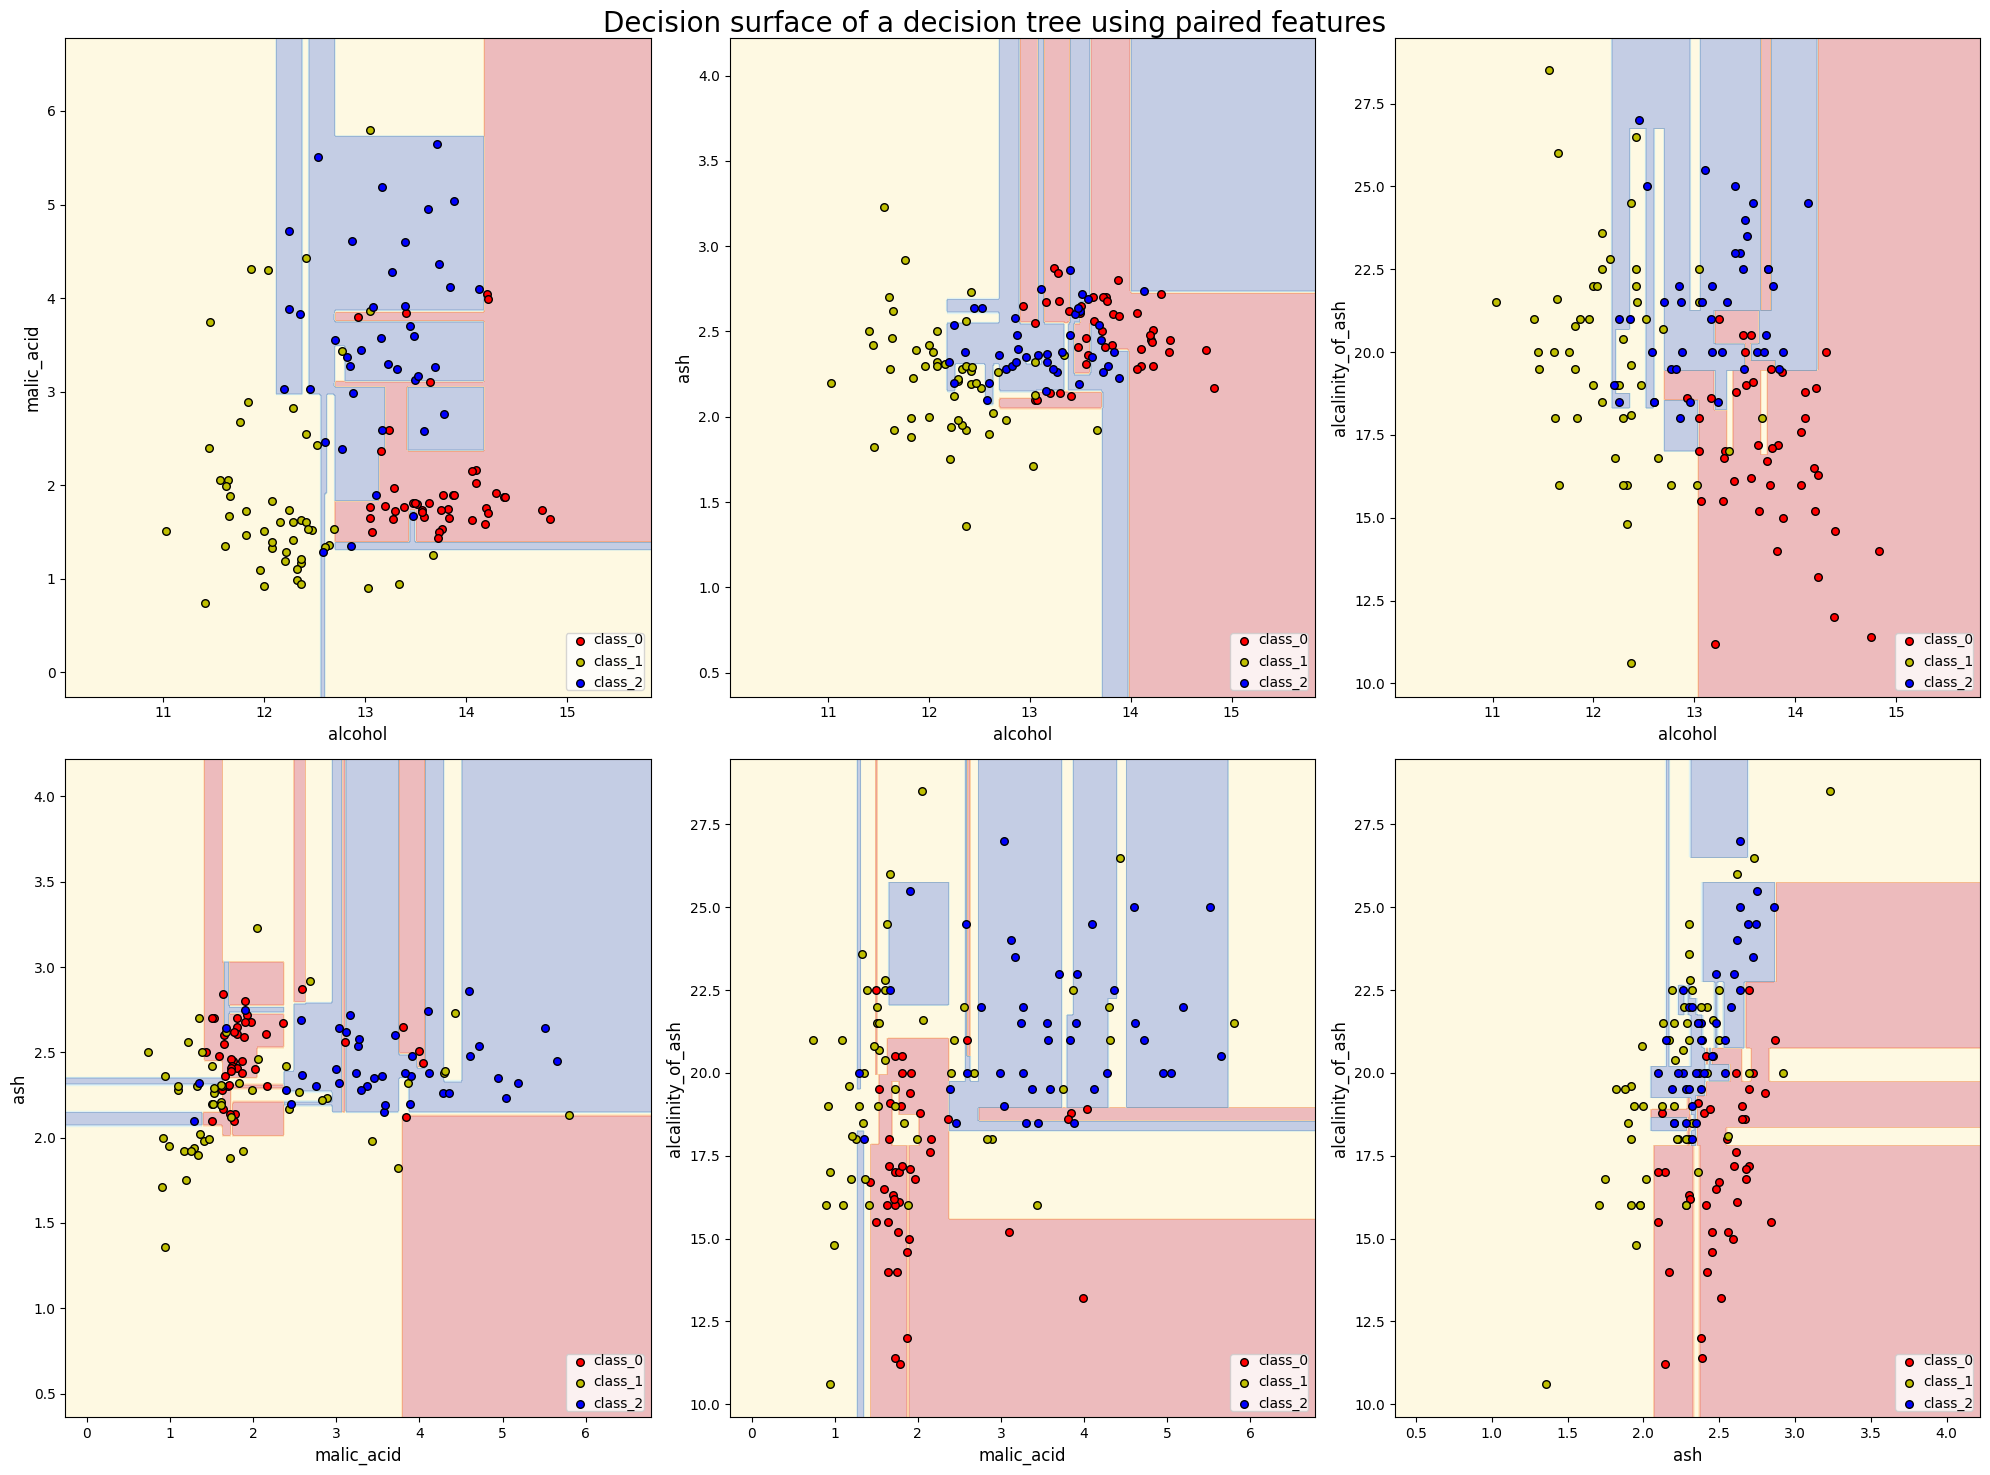

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Vẽ ranh giới quyết định
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
font = {'size': 12}  # kích thước chữ trong trục
plt.figure(figsize=(20, 15))
plt.suptitle("Decision surface of a decision tree using paired features", size=20)

# Lặp qua các cặp đặc trưng
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    plt.subplot(2, 3, pairidx + 1)
    
    X = X_train[:, pair]
    clf = DecisionTreeClassifier().fit(X, y_train)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.xlabel(dataset.feature_names[pair[0]], **font)
    plt.ylabel(dataset.feature_names[pair[1]], **font)
    
    # Hiển thị các điểm huấn luyện
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_train == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=dataset.target_names[i],
                    edgecolor='black', s=30)
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)

plt.tight_layout()
plt.show()